## Prepare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


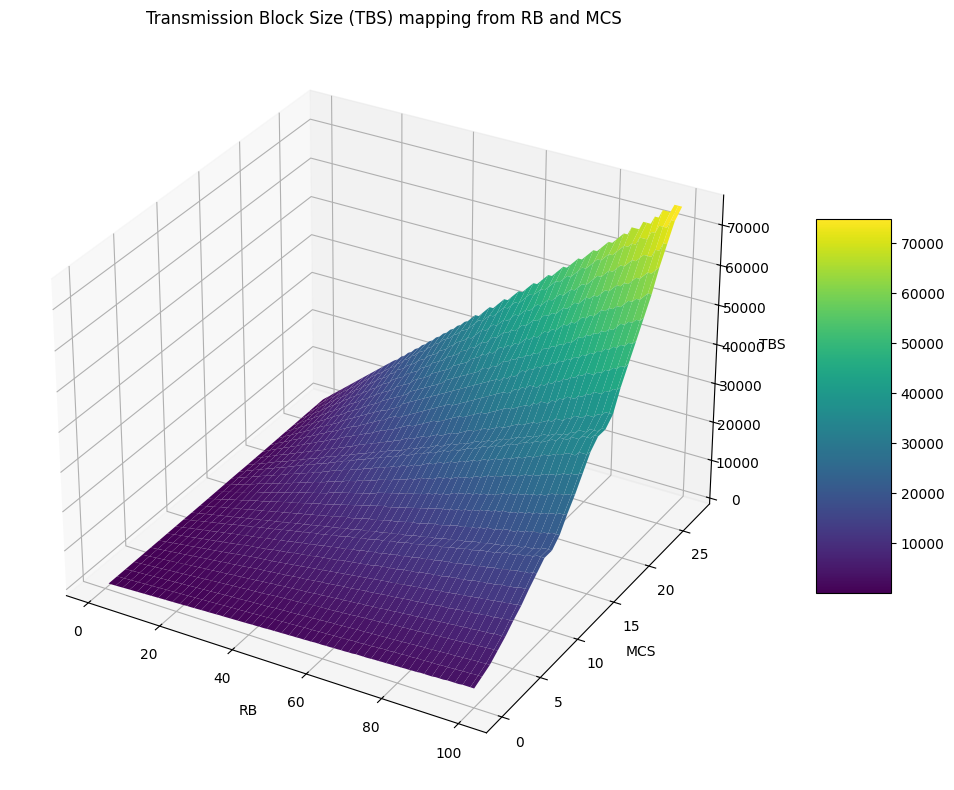

In [2]:
TBS = pd.read_csv('./Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [3]:
# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('./Simulation/result/rr.csv')
MaxC_I_IdealTraffic = pd.read_csv('./Simulation/result/max_c_i.csv')
PF_IdealTraffic = pd.read_csv('./Simulation/result/pf.csv')
QLearning_IdealTraffic = pd.read_csv('./Simulation/result//QLearning_Result.csv')
QLearning_IdealTraffic_v1 = pd.read_csv('./Simulation/result/QLearning_Result_v1.csv')
QLearning_IdealTraffic_v2 = pd.read_csv('./Simulation/result/QLearning_Result_v2.csv')



# Create DataFrame for each property such as: Scheduler Count, Avg Throughput, Max Delay, Avg Delay having 4 columns is UE, RoundRobin, MaxCQI, PF
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
scheduler_count_DF1 = pd.DataFrame(index=ue)
avg_throughput_DF1 = pd.DataFrame(index=ue)
max_delay_DF1 = pd.DataFrame(index=ue)
avg_delay_DF1 = pd.DataFrame(index=ue)

scheduler_count_DF2 = pd.DataFrame(index=ue)
avg_throughput_DF2 = pd.DataFrame(index=ue)
max_delay_DF2 = pd.DataFrame(index=ue)
avg_delay_DF2 = pd.DataFrame(index=ue)

scheduler_count_DF3 = pd.DataFrame(index=ue)
avg_throughput_DF3 = pd.DataFrame(index=ue)
max_delay_DF3 = pd.DataFrame(index=ue)
avg_delay_DF3 = pd.DataFrame(index=ue)

scheduler_count_DF4 = pd.DataFrame(index=ue)
avg_throughput_DF4 = pd.DataFrame(index=ue)
max_delay_DF4 = pd.DataFrame(index=ue)
avg_delay_DF4 = pd.DataFrame(index=ue)

scheduler_count_DF5 = pd.DataFrame(index=ue)
avg_throughput_DF5 = pd.DataFrame(index=ue)
max_delay_DF5 = pd.DataFrame(index=ue)
avg_delay_DF5 = pd.DataFrame(index=ue)

total_throughput_DF1 = pd.DataFrame( columns=['Round Robin', 'Max C/I', 'PF', 'Q Learning'])
total_fairness_DF1 = pd.DataFrame(columns=['Round Robin', 'Max C/I', 'PF', 'Q Learning'])

## Data input

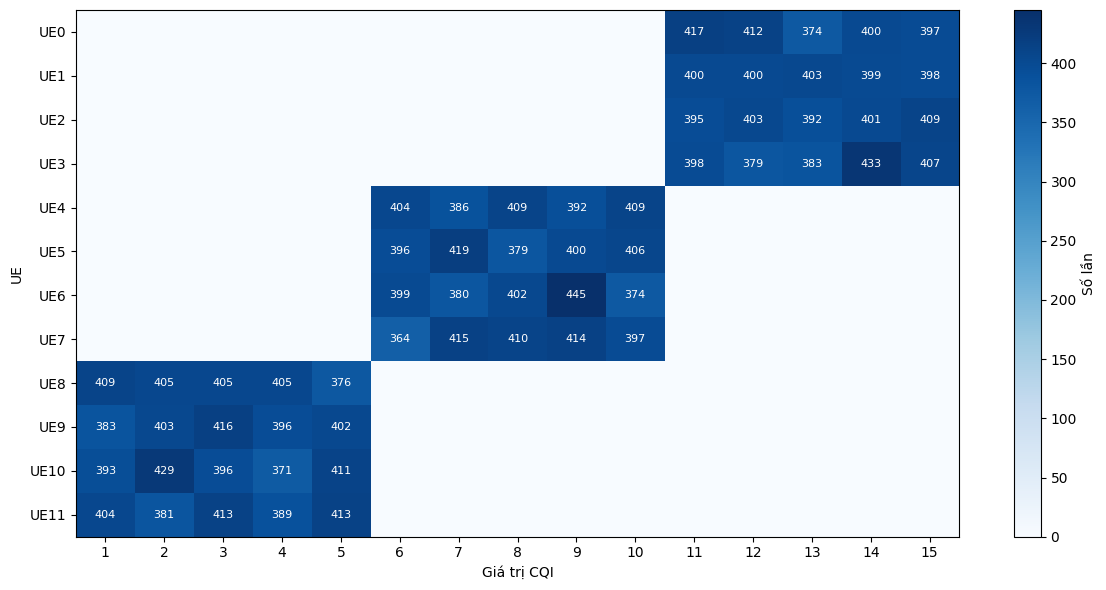

In [4]:
def read_sampled_bsr(csv_path):
    df = pd.read_csv(csv_path)
    return df.iloc[1::10].reset_index(drop=True)

def plot_cqi_count_heatmap(df, cmap='Blues', title=''):
    cqi_bins = list(range(1, 16))
    ue_labels = df.columns

    # Tính số lần xuất hiện giá trị CQI từ 1 đến 15 cho mỗi UE
    count_data = []
    for ue in ue_labels:
        counts = df[ue].value_counts().reindex(cqi_bins, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Gắn nhãn
    ax.set_xticks(np.arange(len(cqi_bins)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(cqi_bins)
    ax.set_yticklabels(ue_labels)

    # Hiển thị giá trị trong từng ô
    for i in range(len(ue_labels)):
        for j in range(len(cqi_bins)):
            value = heatmap_data[i, j]
            if value > 0:
                ax.text(j, i, str(value), ha="center", va="center", color="white", fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị CQI")
    plt.ylabel("UE")
    plt.colorbar(cax, label='Số lần')
    plt.tight_layout()
    plt.show()
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_ideal_condition_bsr100000.csv'))

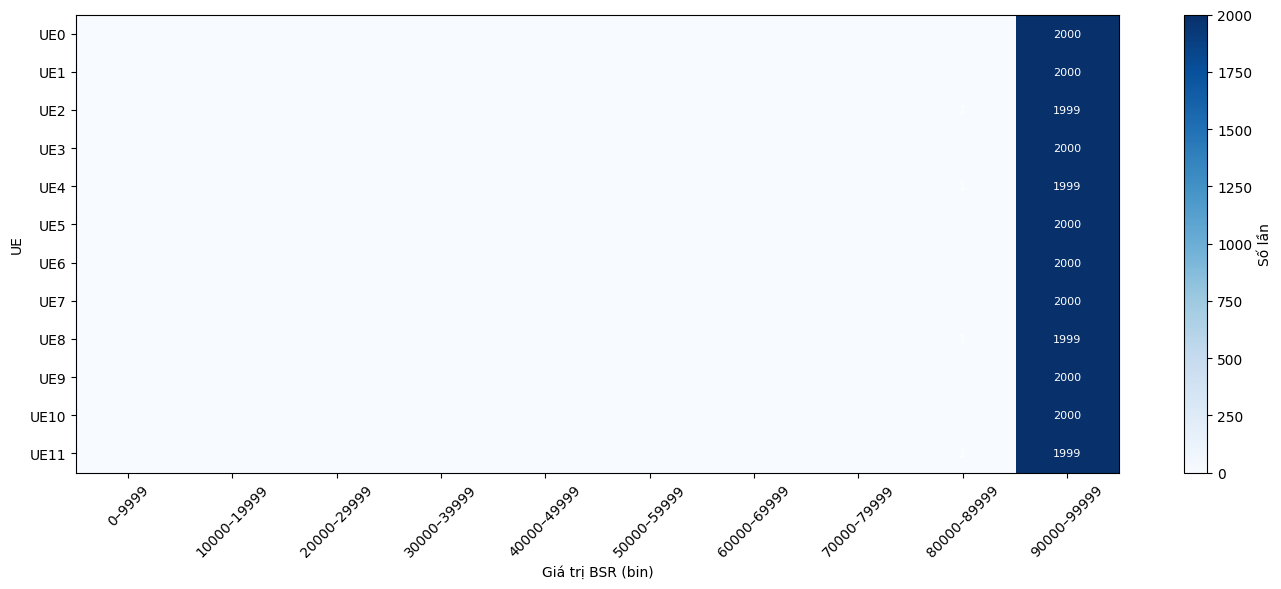

In [5]:

def plot_bsr_count_heatmap(df, bins=None, cmap='Blues', title=''):
    ue_labels = df.columns
    
    # Thiết lập bin mặc định nếu không truyền vào
    if bins is None:
        bins = list(range(0, 110000, 10000))  # 0–100000 chia mỗi 10.000
    
    bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

    # Tính số lần xuất hiện mỗi bin cho từng UE
    count_data = []
    for ue in ue_labels:
        binned = pd.cut(df[ue], bins=bins, labels=bin_labels, include_lowest=True)
        counts = binned.value_counts().reindex(bin_labels, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(14, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Nhãn trục
    ax.set_xticks(np.arange(len(bin_labels)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(bin_labels, rotation=45)
    ax.set_yticklabels(ue_labels)

    # Annotate từng ô
    for i in range(len(ue_labels)):
        for j in range(len(bin_labels)):
            val = heatmap_data[i, j]
            if val > 0:
                ax.text(j, i, str(val), ha='center', va='center', color='white', fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị BSR (bin)")
    plt.ylabel("UE")
    plt.colorbar(cax, label="Số lần")
    plt.tight_layout()
    plt.show()

plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_ideal_condition_bsr100000.csv'))

## Ideal 100000bit

### Round Robin

In [7]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000

x = summary['Avg Throughput (Mbps)'].to_numpy()
fairness_index = (x.sum())**2 / (len(x) * (x**2).sum())
print("Jain's Fairness Index: {:.4f}".format(fairness_index))
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF3['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Round Robin'] = summary['Max Delay']
avg_delay_DF3['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at[0, 'Round Robin'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at[0, 'Round Robin'] = (x.sum())**2 / (len(x) * (x**2).sum())



Jain's Fairness Index: 0.7058
Avg Throughput for cell: 29.240298 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              53.812096        2.0   
UE1              3334                25              53.793928        2.0   
UE2              3334                25              53.934200        2.0   
UE3              3334                25              53.883224        2.0   
UE4              3333                25              26.024920        2.0   
UE5              3333                25              25.961136        2.0   
UE6              3333                25              25.871360        2.0   
UE7              3333                25              25.662520        2.0   
UE8              3333                25               8.049176        2.0   
UE9              3333                25               7.983400        2.0   
UE10             3333                25      

### Max C/I

In [8]:
ue = [col for col in MaxC_I_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxC_I_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000

x = summary['Avg Throughput (Mbps)'].to_numpy()
fairness_index = (x.sum())**2 / (len(x) * (x**2).sum())
print("Jain's Fairness Index: {:.4f}".format(fairness_index))
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    series_values = series.to_numpy()
    scheduled_idx = np.where(series_values > 0)[0]
    total_length = len(series_values)

    if len(scheduled_idx) == 0:
        return pd.Series({
            'Max Delay': total_length,
            'Avg Delay': total_length
        })

    if len(scheduled_idx) == 1:
        t = scheduled_idx[0]
        return pd.Series({
            'Max Delay': max(t, total_length - 1 - t),
            'Avg Delay': max(t, total_length - 1 - t)
        })

    # Tính delay giữa các lần lập lịch
    delay_list = np.diff(scheduled_idx) - 1

    return pd.Series({
        'Max Delay': delay_list.max(),
        'Avg Delay': delay_list.mean()
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# printf jain index

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Max C/I'] = summary['Scheduler Count']
avg_throughput_DF3['Max C/I'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Max C/I'] = summary['Max Delay']
avg_delay_DF3['Max C/I'] = summary['Avg Delay']


total_throughput_DF1.at[0, 'Max C/I'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at[0, 'Max C/I'] = (x.sum())**2 / (len(x) * (x**2).sum())

Jain's Fairness Index: 0.5021
Avg Throughput for cell: 43.892305 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              6501                25             103.473576        5.0   
UE1              6509                25             103.364832        5.0   
UE2              6509                25             103.532128        5.0   
UE3              6514                25             103.699320        5.0   
UE4              3646                25              29.394048        8.0   
UE5              3555                25              28.794776        8.0   
UE6              3441                25              27.778416        8.0   
UE7              3325                25              26.670560        8.0   
UE8                 0                 0               0.000000    10000.0   
UE9                 0                 0               0.000000    10000.0   
UE10                0                 0      

### Proportional Fair

In [9]:
ue = [col for col in PF_IdealTraffic.columns if col.startswith('UE')]
PF_IdealTraffic_UE = PF_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_IdealTraffic_UE.sum() / 1_000_000


x = summary['Avg Throughput (Mbps)'].to_numpy()
fairness_index = (x.sum())**2 / (len(x) * (x**2).sum())
print("Jain's Fairness Index: {:.4f}".format(fairness_index))

def calc_delays(series):
    series_values = series.to_numpy()
    scheduled_idx = np.where(series_values > 0)[0]
    total_length = len(series_values)

    if len(scheduled_idx) == 0:
        return pd.Series({
            'Max Delay': total_length,
            'Avg Delay': 0
        })

    if len(scheduled_idx) == 1:
        t = scheduled_idx[0]
        return pd.Series({
            'Max Delay': max(t, total_length - 1 - t),
            'Avg Delay': 0
        })

    # Tính delay giữa các lần lập lịch
    delay_list = np.diff(scheduled_idx) - 1

    return pd.Series({
        'Max Delay': delay_list.max(),
        'Avg Delay': delay_list.mean()
    })


delays = PF_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['PF'] = summary['Scheduler Count']
avg_throughput_DF3['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['PF'] = summary['Max Delay']
avg_delay_DF3['PF'] = summary['Avg Delay']

total_throughput_DF1.at[0, 'PF'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at[0, 'PF'] = (x.sum())**2 / (len(x) * (x**2).sum())


Jain's Fairness Index: 0.7233
Avg Throughput for cell: 32.869411 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3584                25              59.246056       11.0   
UE1              3577                25              59.215520       12.0   
UE2              3582                25              59.269064       15.0   
UE3              3581                25              59.396416       11.0   
UE4              3372                25              29.666736       21.0   
UE5              3364                25              29.653448       20.0   
UE6              3372                25              29.379736       20.0   
UE7              3365                25              29.283848       22.0   
UE8              3050                25               9.900600       31.0   
UE9              3035                25               9.782272       30.0   
UE10             3073                25      

### Q Learning

In [10]:
ue = [col for col in QLearning_IdealTraffic.columns if col.startswith('UE')]
Q_Learning_IdealTraffic_UE = QLearning_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (Q_Learning_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = Q_Learning_IdealTraffic_UE.sum() / 1_000_000


x = summary['Avg Throughput (Mbps)'].to_numpy()
fairness_index = (x.sum())**2 / (len(x) * (x**2).sum())
print("Jain's Fairness Index: {:.4f}".format(fairness_index))

def calc_delays(series):
    series_values = series.to_numpy()
    scheduled_idx = np.where(series_values > 0)[0]
    total_length = len(series_values)

    if len(scheduled_idx) == 0:
        return pd.Series({
            'Max Delay': total_length,
            'Avg Delay': 0
        })

    if len(scheduled_idx) == 1:
        t = scheduled_idx[0]
        return pd.Series({
            'Max Delay': max(t, total_length - 1 - t),
            'Avg Delay': 0
        })

    # Tính delay giữa các lần lập lịch
    delay_list = np.diff(scheduled_idx) - 1

    return pd.Series({
        'Max Delay': delay_list.max(),
        'Avg Delay': delay_list.mean()
    })


delays = Q_Learning_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Q Learning'] = summary['Scheduler Count']
avg_throughput_DF3['Q Learning'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Q Learning'] = summary['Max Delay']
avg_delay_DF3['Q Learning'] = summary['Avg Delay']

total_throughput_DF1.at[0, 'Q Learning'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at[0, 'Q Learning'] = (x.sum())**2 / (len(x) * (x**2).sum())

Jain's Fairness Index: 0.6274
Avg Throughput for cell: 32.596686 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              4238                25              68.291432       58.0   
UE1              4132                25              66.574552       56.0   
UE2              3744                25              60.086880       59.0   
UE3              4311                25              69.937672       51.0   
UE4              3566                25              27.486840       61.0   
UE5              3164                25              24.381128       81.0   
UE6              3314                25              25.839152       92.0   
UE7              3029                25              23.457720       61.0   
UE8              2832                25               6.916704       82.0   
UE9              2456                25               5.890400       60.0   
UE10             2636                25      

### Analysics

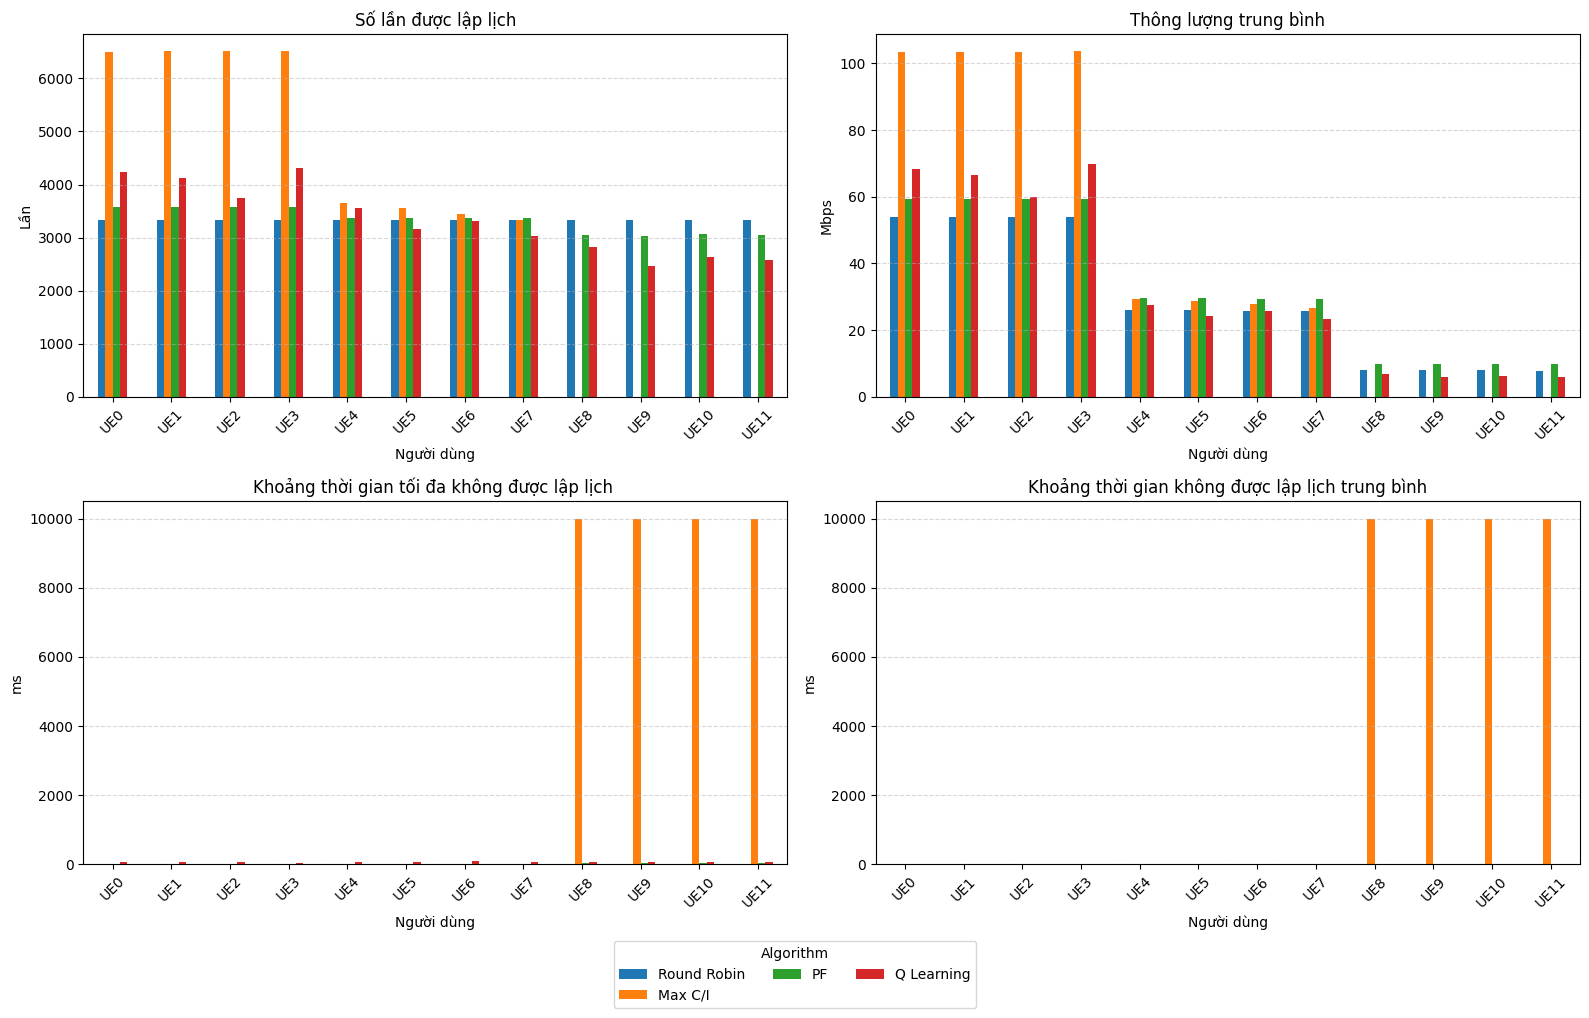

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF3.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Số lần được lập lịch")
axes[0, 0].set_ylabel("Lần")
axes[0, 0].set_xlabel("Người dùng")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF3.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Thông lượng trung bình")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("Người dùng")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF3.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Khoảng thời gian tối đa không được lập lịch ")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("Người dùng")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF3.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Khoảng thời gian không được lập lịch trung bình")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("Người dùng")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Total of Cell

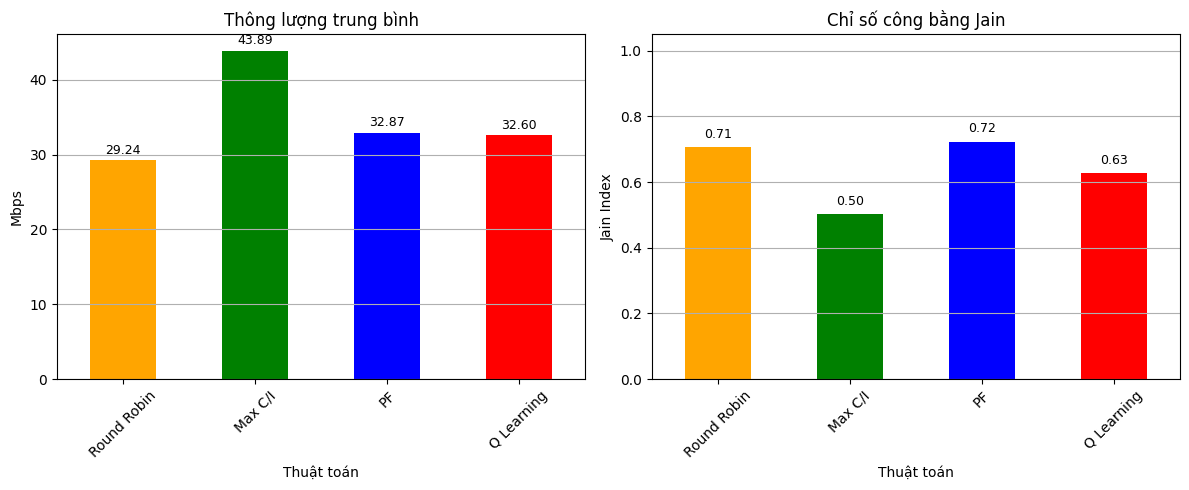

In [12]:
algorithms = ['Round Robin', 'Max C/I', 'PF', 'Q Learning']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Throughput ===
bars1 = total_throughput_DF1.iloc[0].plot(kind='bar', ax=axes[0], color=['orange', 'green', 'blue', 'red'])
axes[0].set_title('Thông lượng trung bình')
axes[0].set_ylabel('Mbps')
axes[0].set_xlabel('Thuật toán')
axes[0].set_xticklabels(algorithms, rotation=45)
axes[0].grid(True, axis='y')

# Add value on top of bars
for i, bar in enumerate(bars1.patches):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

# === Fairness Index ===
bars2 = total_fairness_DF1.iloc[0].plot(kind='bar', ax=axes[1], color=['orange', 'green', 'blue', 'red'])
axes[1].set_title('Chỉ số công bằng Jain')
axes[1].set_ylabel('Jain Index')
axes[1].set_xlabel('Thuật toán')
axes[1].set_xticklabels(algorithms, rotation=45)
axes[1].set_ylim(0, 1.05)
axes[1].grid(True, axis='y')

# Add value on top of bars
for i, bar in enumerate(bars2.patches):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
